### Testing code written by Landon Moceri
### With the help of Github Copilot

# Imports

In [15]:
# Imports
import cv2
import numpy as np
from skimage import color as skcolor
from webcolors import hex_to_rgb
import matplotlib.pyplot as plt

# Capture Brick

In [52]:
# Get the frame from the camera
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

ret, frame = cap.read()

cap.release()

# Preview the frame
cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find Color Of Brick

#051750


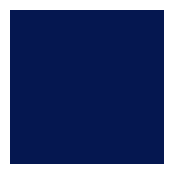

In [53]:
# Get the middle pixel 
middle_pixel = frame[int(frame.shape[0]/2), int(frame.shape[1]/2)]

# Convert from BGR to RGB
middle_pixel_rgb = middle_pixel[::-1]

# Convert to hex
middle_pixel_hex = '#{:02x}{:02x}{:02x}'.format(middle_pixel_rgb[0], middle_pixel_rgb[1], middle_pixel_rgb[2])

# Print the middle pixel color in hex
print(middle_pixel_hex)

# Plot the color
plt.figure(figsize=(2,2))
plt.imshow([[middle_pixel_rgb]])
plt.axis('off')
plt.show()

## Preview Color Dictionary

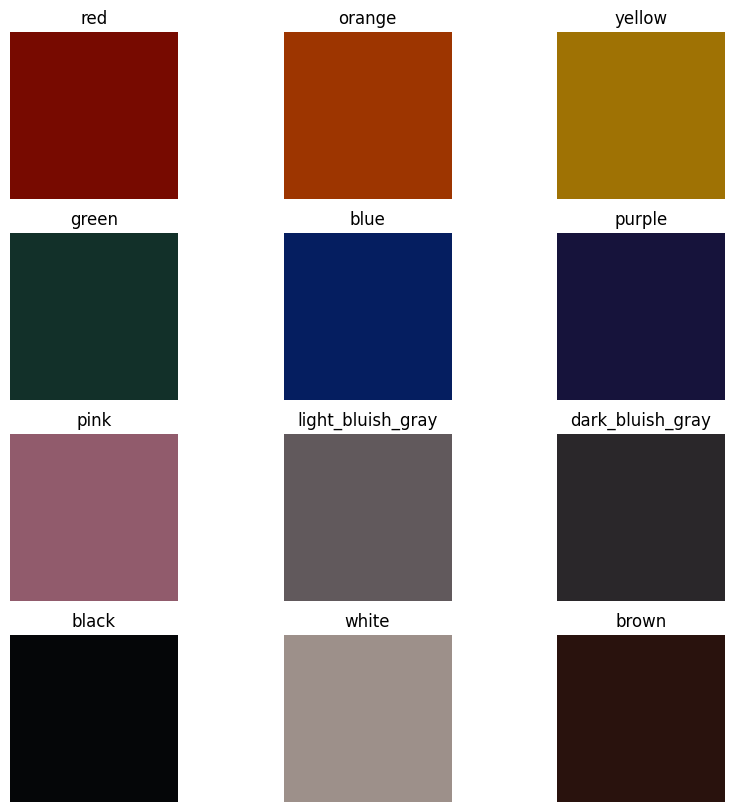

In [8]:
# Initialize the color dictionary
color_dict = {
"#770A00": "red",  
"#9D3500": "orange", 
"#9F7204": "yellow",  
"#123029": "green", 
"#051E60": "blue",  
"#16133B": "purple",  
"#915B6C": "pink",  
"#61595C": "light_bluish_gray",  
"#2A272A": "dark_bluish_gray",  
"#050608": "black",  
"#9D908A": "white",  
"#29120D": "brown"  
}

# Plot all the colors on a grid
colors = list(color_dict.keys())
color_names = list(color_dict.values())

plt.figure(figsize=(10,10))
for i in range(len(colors)):
    plt.subplot(4,3,i+1)
    plt.imshow([[np.array([int(colors[i][j:j+2], 16) for j in (1, 3, 5)])]])
    plt.axis('off')
    plt.title(color_names[i])
    
plt.show()


## Get Closest Color

In [54]:
# Find the closest color
def closest_color(color_dict, pixel):
    # Convert the pixel to 8-bit unsigned integer format
    pixel = np.uint8(pixel)

    # Convert the pixel to Lab color space
    pixel_lab = skcolor.rgb2lab([[[pixel / 255]]]).flatten()
    color_dict_lab = {col: skcolor.rgb2lab([[[np.array(hex_to_rgb(col)) / 255]]]).flatten() for col in color_dict.keys()}

    # Find the closest match in the dictionary
    closest_color = min(color_dict_lab.keys(), 
                        key=lambda color: np.linalg.norm(color_dict_lab[color] - pixel_lab))

    print("Pixel color:", pixel)
    print("Closest match in the dictionary:", color_dict[closest_color])
    return color_dict[closest_color]

# Test the function
closest_color(color_dict, middle_pixel_rgb)

Pixel color: [ 5 23 80]
Closest match in the dictionary: blue


'blue'